In [381]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group

In [382]:
#Setting
m = 10
m_1 = 1

In [383]:
def uniformSphere(d, m_x):
    x = np.random.normal(size=(m_x,d))
    for i in range(m_x):
        x[i] = x[i] / np.linalg.norm(x[i])
    return x
def test(a,x,f):
    return f(np.dot(a,x))

def g(x):
    return 1/(1+np.exp(-x))

def dg(x):
    #return sig(x)*(1-sig(x))
    return np.exp(x)/(1+np.exp(x))**2

def ddg(x):
    return -np.exp(x)*(np.exp(x) - 1)/(1+np.exp(x))**3

def dddg(x):
    return np.exp(x)(1-4*np.exp(x)+np.exp(2*x))/(1+np.exp(x))**4

def f_inner(x,a,foo):
    v = [foo(np.dot(x,e)) for e in a]
    return np.array(v)

def f(x,a,b):
    return g(np.dot(b[0],f_inner(x,a,g)))

def df(X,a,b):
    ret = []
    for x in X: 
        right = np.dot(A, b[0]*f_inner(x,a,dg))
        ret.append(dg(np.dot(b[:,0],f_inner(x,a,g)))*right)
    return ret

def ddf(X,a,b):
    ret = []
    samples = len(X)
    i = 1
    for x in X:
        i += 1
        if samples % 5000 ==0:
            print("Passed ", i ," samples")
        right = np.dot(A, b[0]*f_inner(x,a,dg))
        right2 = np.tensordot(right,right,axes=0)
        term1 = ddg(np.dot(b[:,0], f_inner(x,a,g)))*right2
        term2 = dg(np.dot(b[:,0],f_inner(x,a,g)))
        temp = np.zeros(shape = (m,m))
        for i in range(m):
            temp += b[i,0]*ddg(np.dot(a[:,i],x))*np.tensordot(a[:,i],a[:,i],axes=0)
        r = term1 + term2*temp
        ret.append(r)
    return ret

In [384]:
X = uniformSphere(m, 2*50**2)
A = ortho_group.rvs(dim = m)# m orthogonal vectors with dim m, a_1, ..., a_m
A = np.transpose(A)
B = ortho_group.rvs(dim = m)[:m_1]#m_1 orthogonal vectors with dimension m b_1, ..., b_m_1
B = np.transpose(B)

In [385]:
np.dot(A[:,0],X[0])

0.013453313851121015

In [386]:
hmm = ddf(X, A,B)

Passed  2  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
P

Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples


Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples


Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples


Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples


Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples


Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples


Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples


Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples
Passed  10  samples


In [387]:
mak = [np.reshape(dd, (m**2,)) for dd in hmm]

In [388]:
M = np.transpose(np.array(mak))
M.shape

(100, 5000)

In [389]:
U,D,V = np.linalg.svd(M)

In [390]:
V.shape

(5000, 5000)

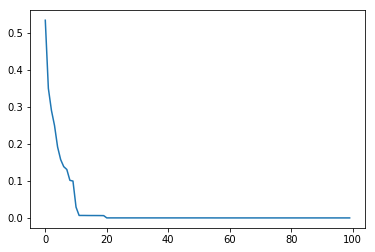

In [391]:
plt.plot(list(range(m**2)), D)

In [392]:
U_trunc = U[:, :m+m_1]
U_unvec = []
for i in range(m+m_1):
    U_unvec.append(np.reshape(U_trunc[:,i]/np.linalg.norm(U_trunc[:,i]) , (m,m)))

In [393]:
i = 7
U_unvec[10][i,i]

0.047106629333057148

In [400]:

for j in range(m):
    res = []
    for i in range(m+m_1):
        res.append(np.inner(U_trunc[:,i], U_trunc[:,j]))

    print(res)

[1.0000000000000007, 1.2490009027033011e-16, 1.7867651802561113e-16, -4.163336342344337e-17, -2.7755575615628914e-17, 6.2450045135165055e-17, 6.1582683397176652e-17, 6.9388939039072284e-17, -8.3266726846886741e-17, 4.3368086899420177e-17, -4.8572257327350599e-17]
[1.2490009027033011e-16, 1.0000000000000004, 7.4593109467002705e-17, -8.6736173798840355e-17, -4.3368086899420177e-17, 2.1684043449710089e-16, 2.8666305440516737e-16, 1.6566609195578508e-16, -1.4051260155412137e-16, 5.1174342541315809e-17, -4.8572257327350599e-17]
[1.7867651802561113e-16, 7.4593109467002705e-17, 1.0000000000000011, 1.9775847626135601e-16, -7.3725747729014302e-18, 0.0, 5.2041704279304213e-17, 2.0383000842727483e-17, 6.9388939039072284e-18, -4.2500725161431774e-17, 5.2041704279304213e-18]
[-4.163336342344337e-17, -8.6736173798840355e-17, 1.9775847626135601e-16, 1.0000000000000002, -9.540979117872439e-17, -5.5511151231257827e-17, 1.8084492237058214e-16, 3.9898639947466563e-17, 9.1072982488782372e-17, 1.1275702593

In [372]:
len(res

100